# Clustering de documents

## Imports

In [60]:
import collections
import os
import string
import sys

import pandas as pd
from nltk import word_tokenize
from nltk.corpus import stopwords
from pprint import pprint
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine

In [61]:
import nltk

nltk.download('punkt')
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fatig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Fatig\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [62]:
data_path = "../../data/txt/"

## Charger tous les  fichiers de la décennie et en créer une liste de textes

In [153]:
#Choix de la décennie et chargement des fichiers
DECADE = '1910'
files = [f for f in sorted(os.listdir(data_path)) if f"_{DECADE[:-1]}" in f]
texts = [open(data_path + f, "r", encoding="utf-8").read() for f in files]
len(files)

700

## Vectoriser les documents à l'aide de TF-IDF

In [154]:
# Création d'une fonction de pré-traitement
def preprocessing(text, stem=True):
    """ Tokenize text and remove punctuation """
    text = text.translate(string.punctuation)
    tokens = word_tokenize(text)
    return tokens

### Instancier le modèle TF-IDF avec ses arguments

In [155]:
vectorizer = TfidfVectorizer(
    tokenizer=preprocessing,
    stop_words=stopwords.words('french'),
    max_df=0.5, 
    min_df=0.1,
    lowercase=True)

### Construire la matrice de vecteurs à l'aide de la fonction `fit_transform`

In [156]:
tfidf_vectors = vectorizer.fit_transform(texts)

c:\Users\Fatig\tac\tac_venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Appliquer un algorithme de clustering sur les vecteurs TF-IDF des documents

### Définir un nombre de clusters

In [169]:
N_CLUSTERS = 4

### Instancier le modèle K-Means et ses arguments

In [170]:
km_model = KMeans(n_clusters=N_CLUSTERS)

### Appliquer le clustering à l'aide de la fonction `fit_predict`

In [171]:
clusters = km_model.fit_predict(tfidf_vectors)

In [172]:
clustering = collections.defaultdict(list)

for idx, label in enumerate(clusters):
    clustering[label].append(files[idx])

In [175]:
pprint(dict(clustering))

{0: ['KB_JB838_1910-01-06_01-00008.txt',
     'KB_JB838_1910-01-09_01-00010.txt',
     'KB_JB838_1910-02-01_01-00007.txt',
     'KB_JB838_1910-02-10_01-00011.txt',
     'KB_JB838_1910-03-08_01-00006.txt',
     'KB_JB838_1910-03-17_02-00008.txt',
     'KB_JB838_1910-04-30_01-00007.txt',
     'KB_JB838_1910-05-02_01-00008.txt',
     'KB_JB838_1910-07-04_01-00006.txt',
     'KB_JB838_1910-07-12_01-00006.txt',
     'KB_JB838_1910-07-14_01-00007.txt',
     'KB_JB838_1910-07-15_01-00007.txt',
     'KB_JB838_1910-09-02_01-00008.txt',
     'KB_JB838_1910-09-24_01-00008.txt',
     'KB_JB838_1910-10-14_01-00008.txt',
     'KB_JB838_1910-11-01_01-00006.txt',
     'KB_JB838_1910-11-06_01-00008.txt',
     'KB_JB838_1910-11-18_01-00007.txt',
     'KB_JB838_1910-11-24_01-00007.txt',
     'KB_JB838_1910-12-04_01-00013.txt',
     'KB_JB838_1910-12-06_01-00007.txt',
     'KB_JB838_1910-12-10_01-00007.txt',
     'KB_JB838_1911-01-23_01-00008.txt',
     'KB_JB838_1911-02-15_01-00008.txt',
     'KB_JB838_1

# Visualiser les clusters

In [176]:
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(tfidf_vectors.toarray())

### Générer le plot

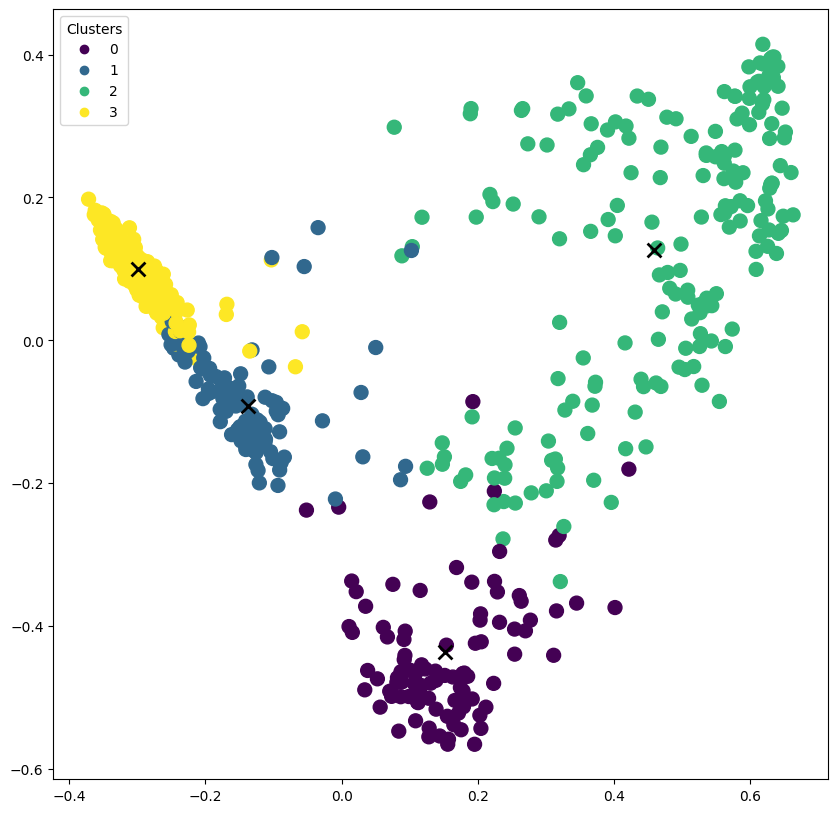

In [177]:
x_axis = reduced_vectors[:, 0]
y_axis = reduced_vectors[:, 1]

plt.figure(figsize=(10,10))
scatter = plt.scatter(x_axis, y_axis, s=100, c=clusters)

# Ajouter les centroïdes
centroids = pca.transform(km_model.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1],  marker = "x", s=100, linewidths = 2, color='black')

# Ajouter la légende
plt.legend(handles=scatter.legend_elements()[0], labels=set(clusters), title="Clusters")

# Word Embedding : word2vec